In [1]:
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from metadata import const

In [2]:
df = pd.read_csv('dataset/clean-sample-100000.csv')
df = shuffle(df)

In [3]:
features = [f for f in df.columns if f != const.class_label]
labels = ['benign', 'attack']
x = df[features]
y = df[const.class_label]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [4]:
clf = tree.DecisionTreeRegressor()
clf.fit(x_train, y_train)

DecisionTreeRegressor()

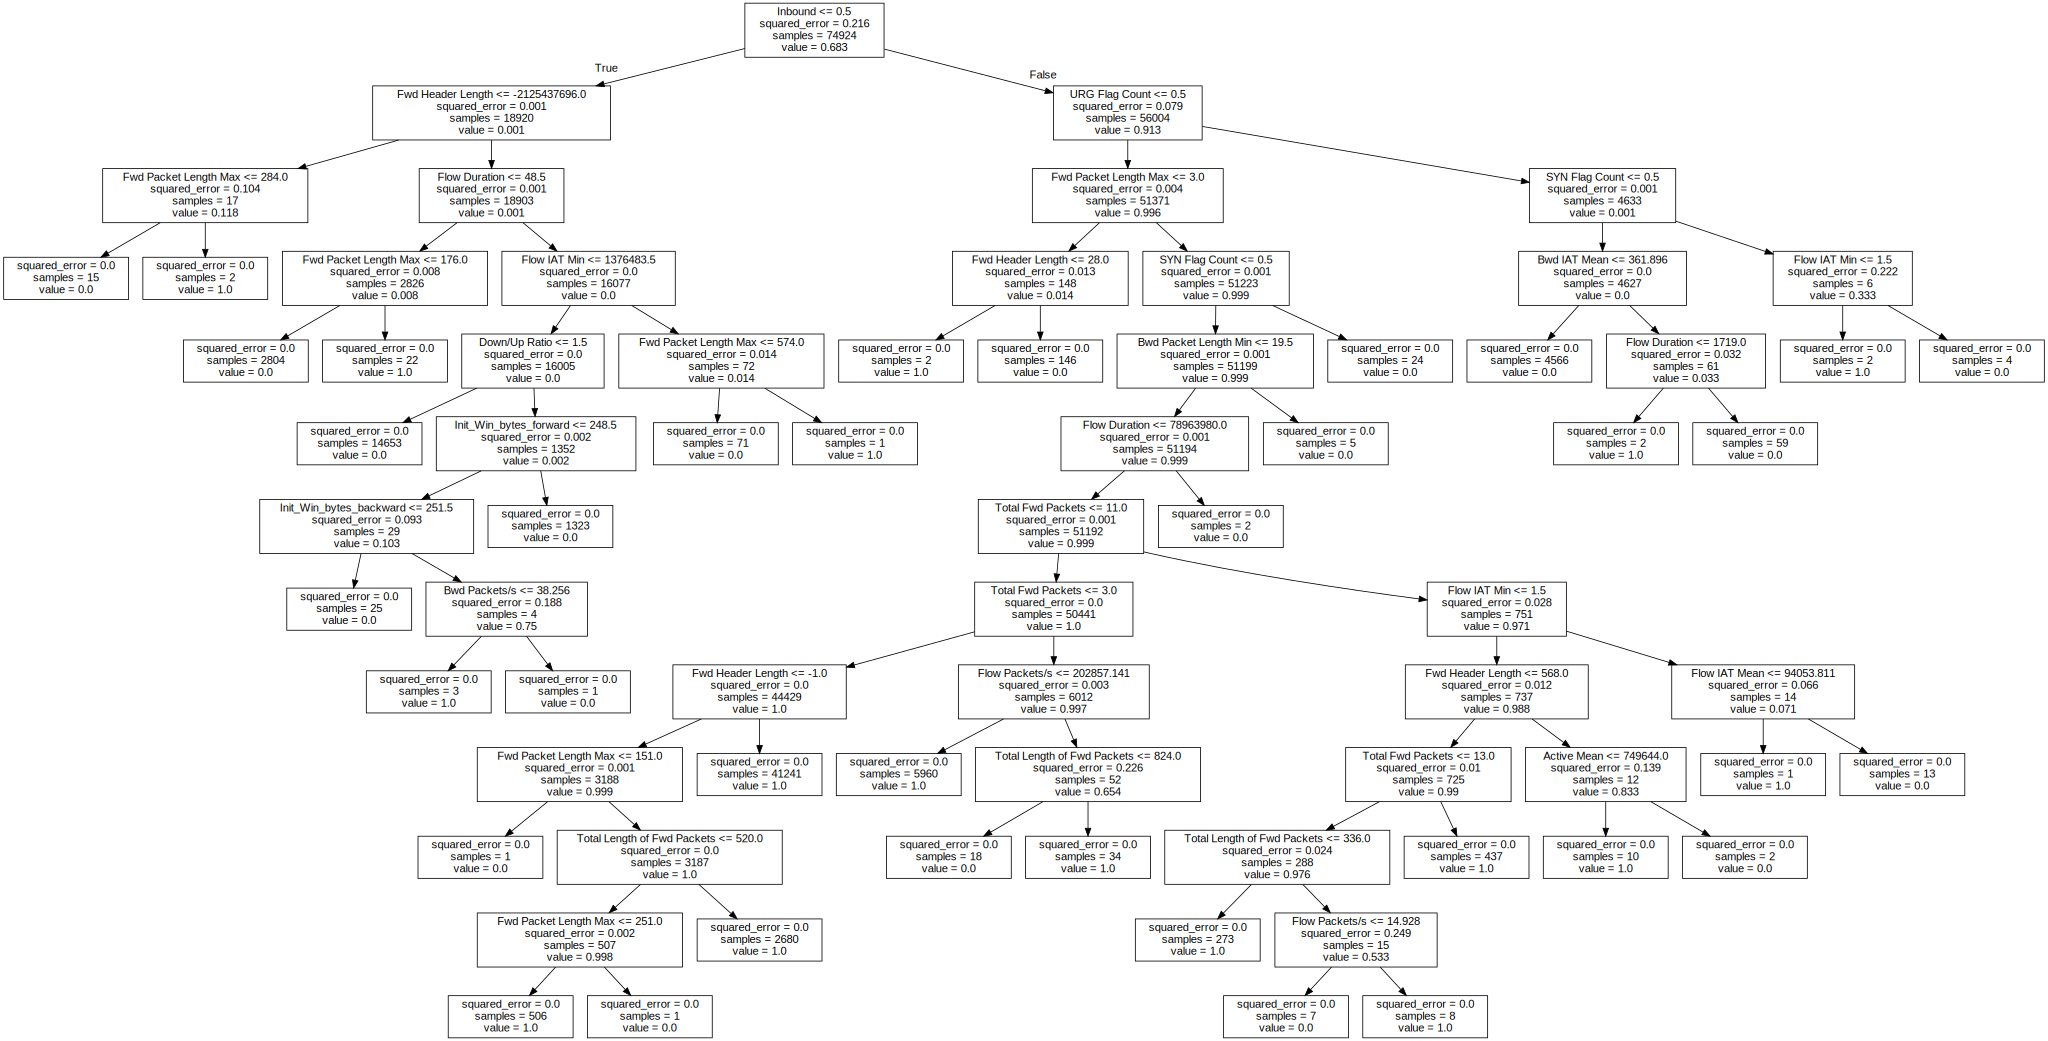

In [5]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=features, class_names=['benign', 'attack'])
graph = graphviz.Source(dot_data)
graph.render(filename='decision-tree')
graph

In [6]:
score = clf.score(x_test, y_test)
print(score)

0.9992600272002814


In [7]:
top_features = []
for i in range(len(clf.feature_importances_)):
    top_features.append((clf.feature_importances_[i], x.columns[i]))
top_features.sort(reverse=True)
for f in top_features:
    print(f[1], "\t\t\t", f[0])

 Inbound 			 0.7252235628860567
 URG Flag Count 			 0.2593600234649603
 Fwd Packet Length Max 			 0.010468329913275913
 SYN Flag Count 			 0.001517272511282583
Total Length of Fwd Packets 			 0.0009167302137222111
 Flow IAT Min 			 0.0007944103590475317
 Flow Packets/s 			 0.0006110670840639779
 Bwd Packet Length Min 			 0.0003077419884203356
 Flow Duration 			 0.00025080770405575816
 Fwd Header Length 			 0.0001538284133763682
 Init_Win_bytes_backward 			 0.00011959982569611827
Active Mean 			 0.00010276725763518309
 Flow IAT Mean 			 5.7256043539602013e-05
 Total Fwd Packets 			 4.726577281817149e-05
 Bwd Packets/s 			 4.6245265935832405e-05
Init_Win_bytes_forward 			 1.8725511171120092e-05
 Bwd IAT Mean 			 3.989997116247094e-06
 Down/Up Ratio 			 3.7578782615515077e-07
Fwd PSH Flags 			 0.0
Bwd Packet Length Max 			 0.0
 Protocol 			 0.0
 Idle Std 			 0.0
 Fwd Packet Length Std 			 0.0
 CWE Flag Count 			 0.0
 Bwd IAT Min 			 0.0
 Bwd Header Length 			 0.0
 Active Std 			 0.0
 ACK 